<a href="https://colab.research.google.com/github/Karthick1606/prediction_using_unsupervised_ML/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP :** ***THE SPARKS FOUNDATION***

# **DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

# **TASK 2 :**  PREDICTION USING UNSUPERVISED MACHINE LEARNING ALGORITHM
*TASK 2 : predict the optimum number of clusters and represent it visually*

*DATA SET(IRIS DATA) : https://bit.ly/3kXTdox*

# **Using K-Means Clustering Algorithm**

#   **NAME :** KARTHICK P

# **BATCH :** JULY 2022

In [ ]:
# Importing all libraries required in this notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

# Loading the iris dataset

In [ ]:
names = ['s_len','s_wid','p_len','p_wid','species']
iris_data = pd.read_csv("/content/iris.csv", header = None, names = names)
display(iris_data.head())
print(
    f"The data set contains {iris_data.shape[0]} records"
    f"and {iris_data.shape[1]} features.",
    iris_data['species'].value_counts(), sep = "\n"
)

,s_len,s_wid,p_len,p_wid,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The data set contains 150 recordsand 5 features.
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


# Implementing K-Means Clustering

In [ ]:
train_x = iris_data.drop("species", axis = 1).values

k = 3

kmeans = KMeans(n_clusters = k)
kmeans.fit(train_x)

all_df = iris_data.copy(deep = True)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = names[:-1])
centroids['cluster'] = "centroid"

all_df["cluster"] = kmeans.labels_.astype("str")
all_df = pd.concat([all_df, centroids])

# Comparing the Clustering results with original classes

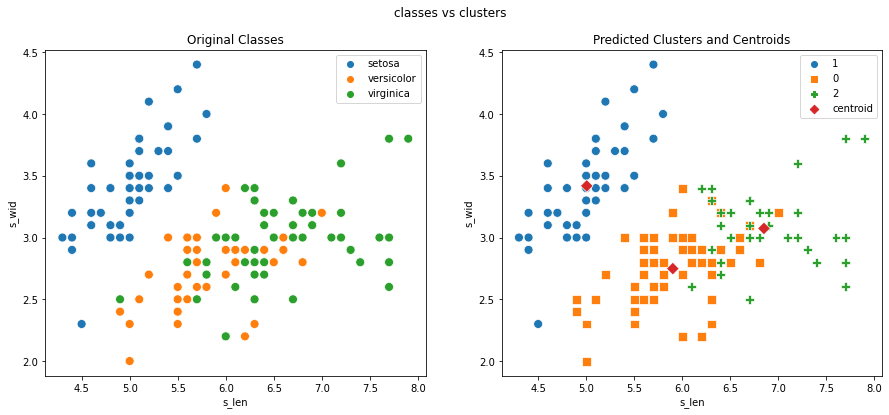

In [ ]:
plt.figure(figsize = (15, 6))
plt.suptitle("classes vs clusters")
plt.subplot(121)
plt.title("Original Classes")
sns.scatterplot(data = all_df, x = "s_len", y = "s_wid", hue = "species", s = 80)
plt.legend(loc = "upper right")

plt.subplot(122)
plt.title("Predicted Clusters and Centroids")
sns.scatterplot(
    data = all_df, x = "s_len", y = "s_wid",
    hue = "cluster", style = "cluster",
    markers = "osPD", s = 80
)
plt.legend(loc = "upper right")
plt.show()

# How do you find the optimum number of clusters for K Means? How does one determine the value of K?

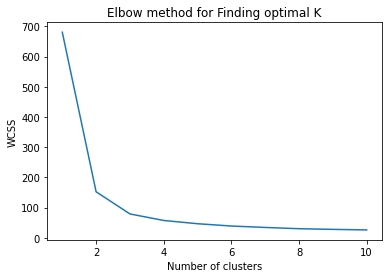

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow method for Finding optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.